In [80]:
# https://siboehm.com/articles/19/normalizing-flow-network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn import datasets

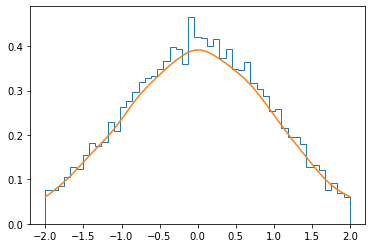

In [94]:
# N(0, 1) (Know)
X1 = np.random.normal(loc = 0, scale = 1, size = 10000)
density_X = stats.gaussian_kde(X1)

n, x, _ = plt.hist(X1, bins = np.linspace(-2, 2, 50), 
                   histtype = u'step', density = True)
plt.plot(x, density_X(x))

In [95]:
def f(x):
    return x/3

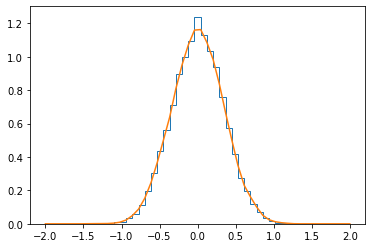

In [96]:
# N(0, 1/3) (Unknow)
X2 = f(X1)
density_X2 = stats.gaussian_kde(X2)

n, x, _ = plt.hist(X2, bins = np.linspace(-2, 2, 50), 
                   histtype = u'step', density = True)
plt.plot(x, density_X2(x))

In [97]:
def f_inv(x):
    return x*3

In [109]:
np.round(X1, 5) == np.round(f_inv(X2), 5)

array([ True,  True,  True, ...,  True,  True,  True])

In [120]:
# How can I sample from X2? (Given some X1 value)
x1 = np.random.normal(loc = 0, scale = 1)
print(x1)

x2 = f(x1)
print(x2)

-1.2643893826005512
-0.42146312753351706


In [115]:
# Same value has different probabilitiy on X2 because with transformation f we
# have changed its density

In [121]:
# We can recover the x1 from the generated x2
x1_recov = f_inv(x2)

print(x1)
print(x1_recov)

-1.2643893826005512
-1.2643893826005512


In [ ]:
# We can do this because f is invertible

In [117]:
# How can we compute the likelihood of x2 (on X2)?
# The distribution behind this density is unknown because we generated
# through a transformation

In [119]:
# We could evaluate x1_sample_recov on X1
stats.norm(0, 1).pdf(x1_sample_recov)

0.10348300234589367

In [ ]:
# But this is not valid cause density in X2 differs from the one of X1

In [122]:
# Density has been compressed so values near the mean on X2 would be more probable
# than those of X1

In [123]:
# We need to take into account this change

In [125]:
# We include this change through the derivative of f_inv wrt x2. This represents the change
# associated with f
def df_inv(x):
    return 3

In [132]:
# The likelihood of a sample x2 is then:
# Likelihood of x2 under X1 * the detransformation on the density
stats.norm(0, 1).pdf(f_inv(x2)) * np.abs(df_inv(x2))

0.5381238720088907

In [131]:
# Which correspond to the true likelihood:
stats.norm(0, 1/3).pdf(x2)

0.5381238720088907